In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
porosity = float(input("Enter Porosity"))
K = float(input("Enter Perm.(md)"))
h = float(input("Enter pay zone thicknes(Feet)"))
P = float(input("Enter  Reservoir Pressure(psi)"))
Bo = float(input("Enter Formation Volume Factor"))
Viscosity  = float(input("Enter fluid viscosity(cp)"))
A = float(input("Enter Drainage Area(Acres)"))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft)"))
S = float(input("Enter Skin Factor"))

Enter Porosity.21
Enter Perm.(md)10
Enter pay zone thicknes(Feet)40
Enter  Reservoir Pressure(psi)2500
Enter Formation Volume Factor1.12
Enter fluid viscosity(cp)2
Enter Drainage Area(Acres)500
Enter Wellbore radius(ft).325
Enter Skin Factor4


In [15]:
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)


The value of productivity index is 0.10323779133216894


In [16]:
qmax = J*P/1.8
print("The value of Qmax is ", qmax, "stb/day")

The value of Qmax is  143.3858212946791 stb/day


In [17]:
a = np.arange(0,P,500)
b = np.append(a,P)
pwf = b[-1::-1]
pwf

array([2500., 2000., 1500., 1000.,  500.,    0.])

In [18]:
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrates = np.array(flowrate)
flowrates

array([  0.        ,  47.03054938,  84.88440621, 113.56157047,
       133.06204216, 143.38582129])

In [19]:
df = pd.DataFrame(flowrates,pwf)
df

,0
2500.0,0.000000
2000.0,47.030549
1500.0,84.884406
1000.0,113.561570
500.0,133.062042
0.0,143.385821


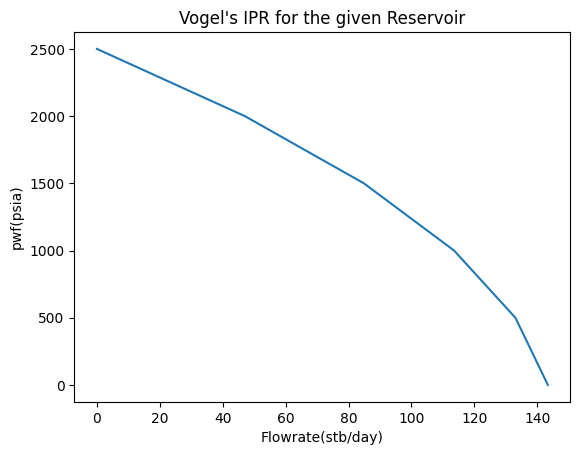

In [20]:
plt.figure()
plt.plot(flowrates,pwf)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for the given Reservoir")
plt.show()